In [71]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

from models import MarkowitzMinVarianceModel, SharpeRatioMaxModel

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn') # style.use('ggplot') # style.use('fivethirtyeight')
%matplotlib inline

In [72]:
# TOPIX Index
df_tpx = pd.read_csv("../data/tse_topix_20040331-20201031.csv")
df_tpx = df_tpx.set_index("Date")
df_tpx = df_tpx[df_tpx.index >= "2004-10-31"]

# TOPIX Core30 
df_tpx30 = pd.read_csv("../data/tse_topixcore30_20001031-202010131.csv")
df_tpx30 = df_tpx30.set_index('Date')
df_tpx30 = df_tpx30[df_tpx30.index >= "2004-10-31"]

# TOPIX 500
df_tpx500 = pd.read_csv("../data/tse_topix500_20001031-202010131.csv")
df_tpx500 = df_tpx500.set_index('Date')
df_tpx500 = df_tpx500[df_tpx500.index >= "2004-10-31"]

Tips:

```python
# cut
st = datetime(2020,6,30).strftime('%Y-%m-%d')
ed = datetime(2020,10,31).strftime('%Y-%m-%d')
df_tpx30[st:ed]
```

### TOPIX INDEX

2004/10/31 - 2020/10/31

In [3]:
df = df_tpx

In [4]:
df_retchg = df.pct_change()
df_retchg[:1] = 0.0 # set 0.0 to the first record

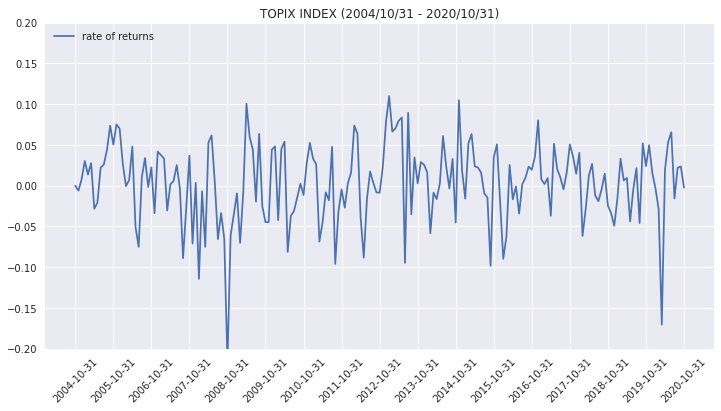

In [5]:
plt.figure(figsize=(12,6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retchg.index.values, df_retchg[col].values, label="rate of returns")
plt.legend(loc="upper left")
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.title("TOPIX INDEX (2004/10/31 - 2020/10/31)")
plt.ylim([-0.2, 0.2])
plt.show()
# plt.savefig("../figures/topixindex_chg_20041031-20201031.png", bbox_inches="tight")

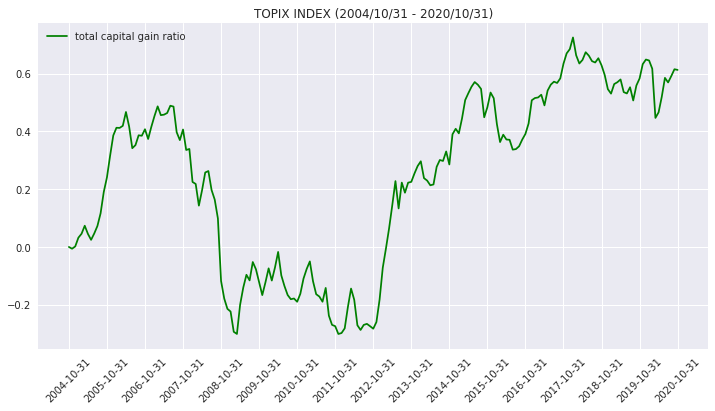

In [6]:
plt.figure(figsize=(12,6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retchg.index.values, df_retchg[col].cumsum().values, label="total capital gain ratio", color="green")    
plt.legend(loc="upper left")
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.title("TOPIX INDEX (2004/10/31 - 2020/10/31)")
plt.show()
# plt.savefig("../figures/topixindex_cum_20041031-20201031.png", bbox_inches="tight")

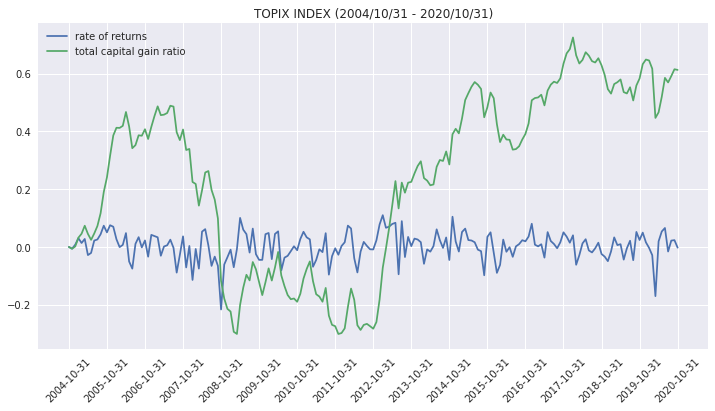

In [7]:
plt.figure(figsize=(12,6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retchg.index.values, df_retchg[col].values, label="rate of returns")
    plt.plot(df_retchg.index.values, df_retchg[col].cumsum().values, label="total capital gain ratio")    
plt.legend(loc="upper left")
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.title("TOPIX INDEX (2004/10/31 - 2020/10/31)")
plt.show()
# plt.savefig("../figures/topixindex_hist_20041031-20201031.png", bbox_inches="tight")

### TOPIX Core30

2004/10/31 - 2020/10/31

In [8]:
df = df_tpx30

In [9]:
df_retchg = df.pct_change()
df_retchg[:1] = 0.0 # set 0.0 to the first record
df_retcum = (1.0 + df_retchg).cumprod()
df_retcum[:1] = 1.0 # set 1.0 to the first record

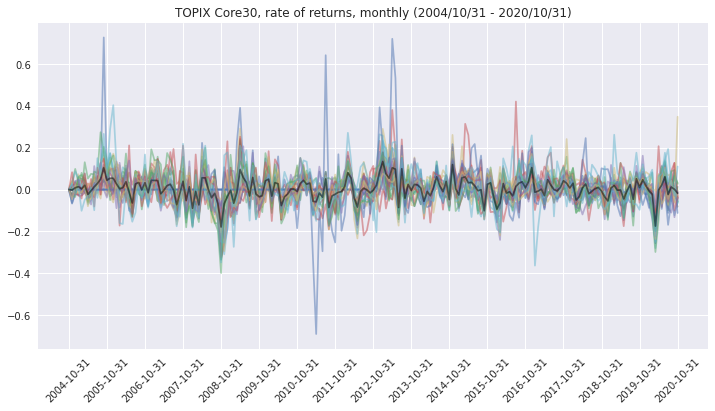

In [10]:
plt.figure(figsize=(12, 6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retchg.index, df_retchg[col], label=col, alpha=0.5)
plt.plot(df_retchg.index, df_retchg.mean(axis='columns'), label="topix30 mean", color="black", alpha=0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.title("TOPIX Core30, rate of returns, monthly (2004/10/31 - 2020/10/31)")
plt.show()
# plt.savefig("../figures/topixcore30_chg_20041031-20201031.png", bbox_inches="tight")

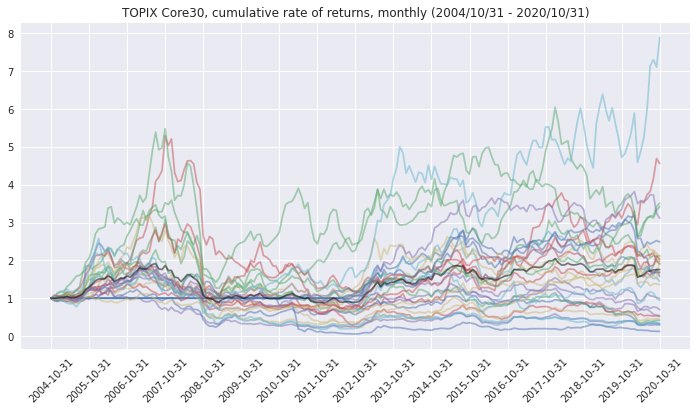

In [11]:
plt.figure(figsize=(12, 6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retcum.index, df_retcum[col], label=col, alpha=0.5)
plt.plot(df_retcum.index, df_retcum.mean(axis='columns'), label="topix30 mean", color="black", alpha=0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.title("TOPIX Core30, cumulative rate of returns, monthly (2004/10/31 - 2020/10/31)")
plt.show()
# plt.savefig("../figures/topixcore30_cum_20041031-20201031.png", bbox_inches="tight")

### TOPIX 500

2004/10/31 - 2020/10/31

In [12]:
df = df_tpx500

In [13]:
df_retchg = df.pct_change()
df_retchg[:1] = 0.0 # set 0.0 to the first record
df_retcum = (1.0 + df_retchg).cumprod()
df_retcum[:1] = 1.0 # set 1.0 to the first record

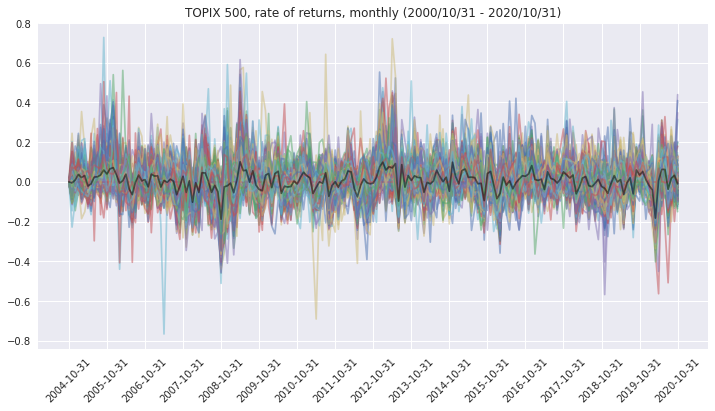

In [14]:
plt.figure(figsize=(12, 6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retchg.index, df_retchg[col], label=col, alpha=0.5)
plt.plot(df_retchg.index, df_retchg.mean(axis='columns'), label="topix30 mean", color="black", alpha=0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.title("TOPIX 500, rate of returns, monthly (2000/10/31 - 2020/10/31)")
plt.show()
# plt.savefig("../figures/topix500_chg_20041031-20201031.png", bbox_inches="tight")

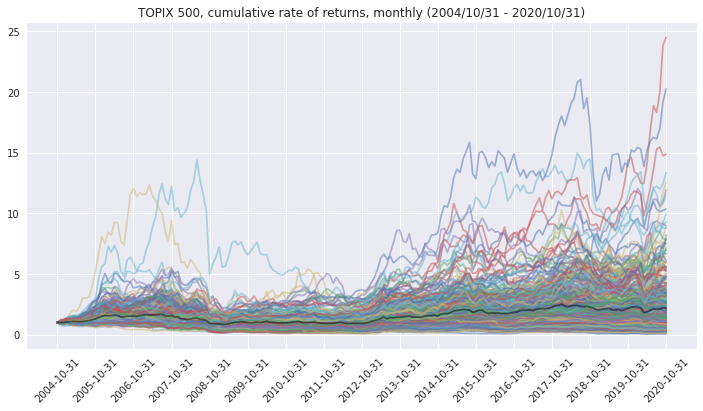

In [15]:
plt.figure(figsize=(12, 6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retcum.index, df_retcum[col], label=col, alpha=0.5)
plt.plot(df_retcum.index, df_retcum.mean(axis='columns'), label="topix30 mean", color="black", alpha=0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.title("TOPIX 500, cumulative rate of returns, monthly (2004/10/31 - 2020/10/31)")
plt.show()
# plt.savefig("../figures/topix500_cum_20041031-20201031.png", bbox_inches="tight")

### TOPIX Series (comparison)

2004/10/31 - 2020/10/31

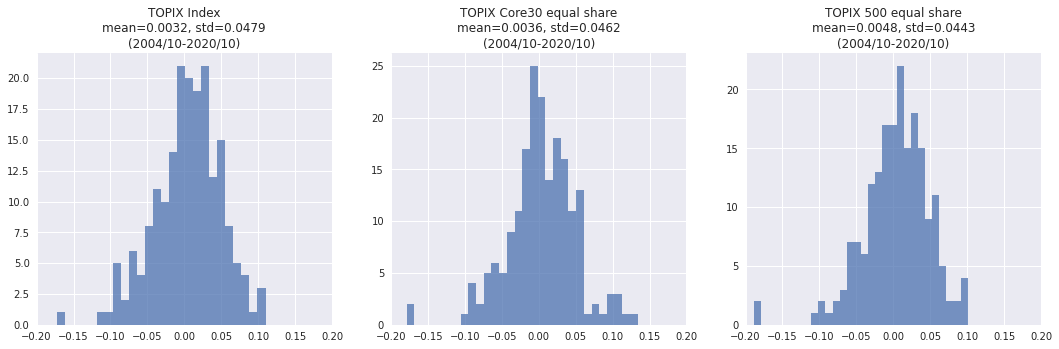

In [16]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
df = df_tpx
df_chg = df.pct_change()
df_chg[:1] = 0
x = df_chg.mean(axis='columns').values
plt.hist(x, bins=30, alpha=0.75)
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.xlim([-0.2, 0.2])
plt.title(f"TOPIX Index\nmean={r_mean}, std={r_std}\n(2004/10-2020/10)")


plt.subplot(1,3,2)
df = df_tpx30
df_chg = df.pct_change()
df_chg[:1] = 0
x = df_chg.mean(axis='columns').values
plt.hist(x, bins=30, alpha=0.75)
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.xlim([-0.2, 0.2])
plt.title(f"TOPIX Core30 equal share\nmean={r_mean}, std={r_std}\n(2004/10-2020/10)")


plt.subplot(1,3,3)
df = df_tpx500
df_chg = df.pct_change()
df_chg[:1] = 0
x = df_chg.mean(axis='columns').values
plt.hist(x, bins=30, alpha=0.75)
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.xlim([-0.2, 0.2])
plt.title(f"TOPIX 500 equal share\nmean={r_mean}, std={r_std}\n(2004/10-2020/10)")


plt.show()
# plt.savefig("../figures/topix_ror_dist_20041031-20201031.png", bbox_inches="tight")

In [ ]:
df_tpx30 = pd.read_csv("../data/tse_topixcore30_20001031-202010131.csv")
df_tpx30 = df_tpx30.set_index('Date')

df = df_tpx30
df_retchg = df.pct_change()
df_retchg[:1] = 0.0 # set 0.0 to the first record

"""
for idx, col in enumerate(df.columns):
    plt.hist(df_retchg[[col]].values, bins=20, label=col, alpha=0.75)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.xlim([-0.25, 0.45])
    if (idx + 1) % 5 == 0:
        plt.show()
"""


sns.pairplot(df_retchg)
plt.savefig("../figures/topixcore30_pairplot_20001031-20201031.png", bbox_inches="tight")

# back-test

In [73]:
# Investment period
ST_BACKTEST = datetime(2011,10,31)
ED_BACKTEST = datetime(2020,10,31)

# Risk-free rate (10Year-JGB, monthly interest)
jgb_int = 0.0001 # 0.01% per year (Japanese Government Bond)
r_f = jgb_int * (1/12) # adjust monthly
r_e = r_f

# TOPIX Index
df_tpx = df_tpx.pct_change()
df_tpx[:1] = 0.0 # set 0.0 to the first record

#### MarkowitzMinVarianceModel

tpx core30, window_size=12, r_e=TOPIX INDEX

Portfolio Performance
Returns per month
  sharpe ratio     : 0.16429629
  mean of returns  : 0.00766910
  std of returns   : 0.04662778
    risk-free rate : 0.00000833
    capgain ratio  : 1.04338255
Returns per year
  sharpe ratio     : 0.56913904
  mean of returns  : 0.09202925
  std of returns   : 0.16152335


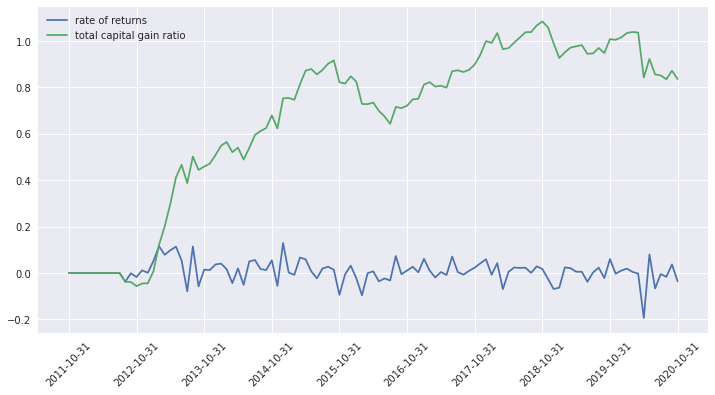

In [74]:
# Model Params
params = {
    "window_size": 12,
    "rebalance_freq": 1,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]
df_re =  df_tpx[st:ed]
params["r_e"] = df_re

# Model (mmvp)
model = MarkowitzMinVarianceModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)
fig = model.plot_returns()
fig.savefig(f"../figures/mmvp_tpx30_w={params['window_size']}_plot.png", bbox_inches="tight")
del model
del fig

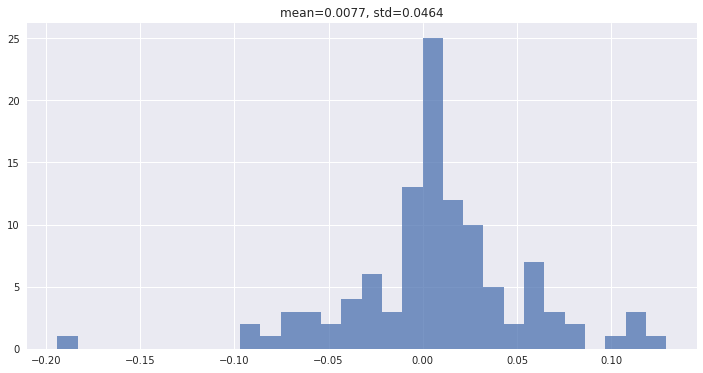

In [75]:
x = df_bt["ror"].values
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.figure(figsize=(12,6))
plt.hist(x, bins=30, alpha=0.75)
plt.title(f"mean={r_mean}, std={r_std}")
plt.savefig(f"../figures/mmvp_tpx30_w={params['window_size']}_hist.png", bbox_inches="tight")

In [14]:
len(df_bt)

109

In [21]:
y = df_bt["ror"].values
x = df_tpx[ST_BACKTEST.strftime('%Y-%m-%d'):ED_BACKTEST.strftime('%Y-%m-%d')]["^TPX"].values
np.corrcoef(x,y)

array([[1.        , 0.12210366],
       [0.12210366, 1.        ]])

#### MarkowitzMinVarianceModel

data=tpx core30, window_size=36, r_e=TOPIX INDEX

Portfolio Performance
Returns per month
  sharpe ratio     : 0.18788996
  mean of returns  : 0.00735206
  std of returns   : 0.03908527
    risk-free rate : 0.00000833
    capgain ratio  : 1.04714952
Returns per year
  sharpe ratio     : 0.65086993
  mean of returns  : 0.08822476
  std of returns   : 0.13539535


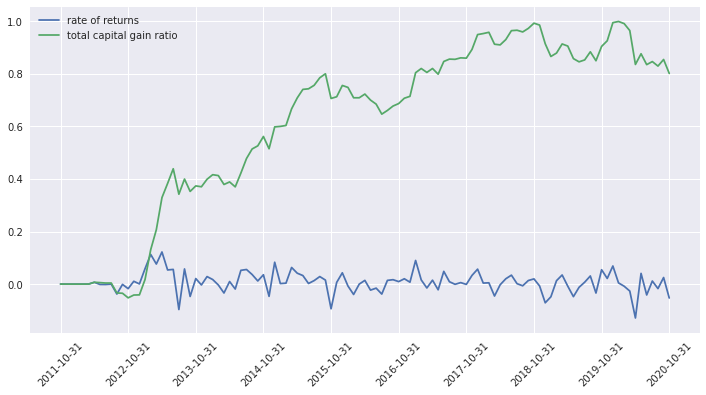

In [76]:
# Model Params
params = {
    "window_size": 36,
    "rebalance_freq": 1,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]
df_re =  df_tpx[st:ed]
params["r_e"] = df_re

# Model (mmvp)
model = MarkowitzMinVarianceModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)
fig = model.plot_returns()
fig.savefig(f"../figures/mmvp_tpx30_w={params['window_size']}_plot.png", bbox_inches="tight")
del model
del fig

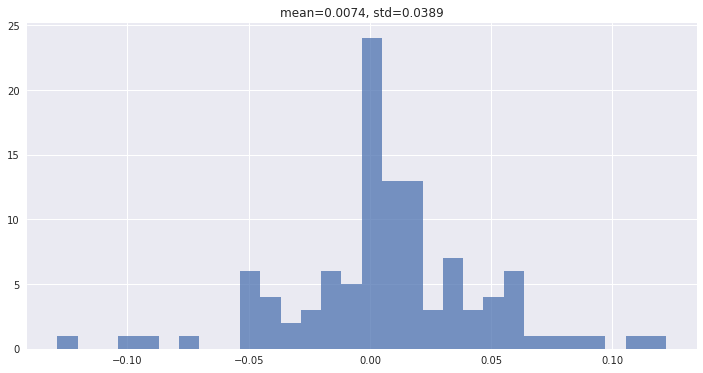

In [77]:
x = df_bt["ror"].values
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.figure(figsize=(12,6))
plt.hist(x, bins=30, alpha=0.75)
plt.title(f"mean={r_mean}, std={r_std}")
plt.savefig(f"../figures/mmvp_tpx30_w={params['window_size']}_hist.png", bbox_inches="tight")

In [27]:
y = df_bt["ror"].values
x = df_tpx[ST_BACKTEST.strftime('%Y-%m-%d'):ED_BACKTEST.strftime('%Y-%m-%d')]["^TPX"].values
np.corrcoef(x,y)

array([[1.        , 0.15293459],
       [0.15293459, 1.        ]])

#### MarkowitzMinVarianceModel

data=tpx core30, window_size=60, r_e=TOPIX INDEX

Portfolio Performance
Returns per month
  sharpe ratio     : 0.17490498
  mean of returns  : 0.00706654
  std of returns   : 0.04035453
    risk-free rate : 0.00000833
    capgain ratio  : 0.97362665
Returns per year
  sharpe ratio     : 0.60588861
  mean of returns  : 0.08479849
  std of returns   : 0.13979218


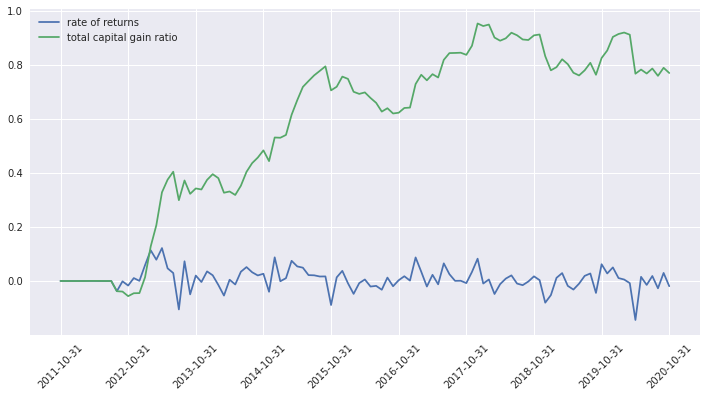

In [78]:
# Model Params
params = {
    "window_size": 60,
    "rebalance_freq": 1,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]
df_re =  df_tpx[st:ed]
params["r_e"] = df_re

# Model (mmvp)
model = MarkowitzMinVarianceModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)
fig = model.plot_returns()
fig.savefig(f"../figures/mmvp_tpx30_w={params['window_size']}_plot.png", bbox_inches="tight")
del model
del fig

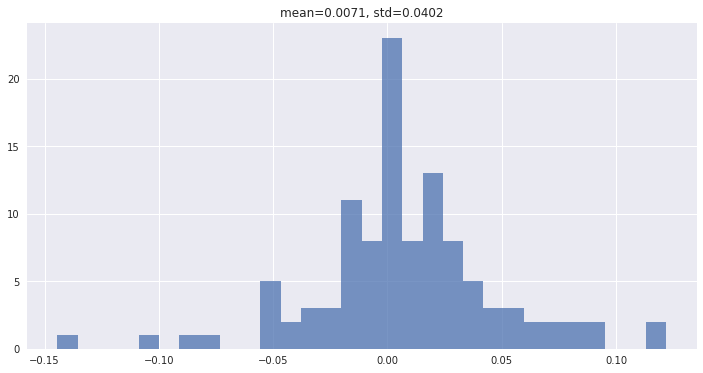

In [79]:
x = df_bt["ror"].values
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.figure(figsize=(12,6))
plt.hist(x, bins=30, alpha=0.75)
plt.title(f"mean={r_mean}, std={r_std}")
plt.savefig(f"../figures/mmvp_tpx30_w={params['window_size']}_hist.png", bbox_inches="tight")

In [30]:
y = df_bt["ror"].values
x = df_tpx[ST_BACKTEST.strftime('%Y-%m-%d'):ED_BACKTEST.strftime('%Y-%m-%d')]["^TPX"].values
np.corrcoef(x,y)

array([[1.        , 0.14740142],
       [0.14740142, 1.        ]])

---

#### SharpeRatioMaxModel

data=tpx core30, window_size=12

Portfolio Performance
Returns per month
  sharpe ratio     : 0.17843329
  mean of returns  : 0.00934051
  std of returns   : 0.05230066
    risk-free rate : 0.00000833
    capgain ratio  : 1.37700126
Returns per year
  sharpe ratio     : 0.61811104
  mean of returns  : 0.11208614
  std of returns   : 0.18117479


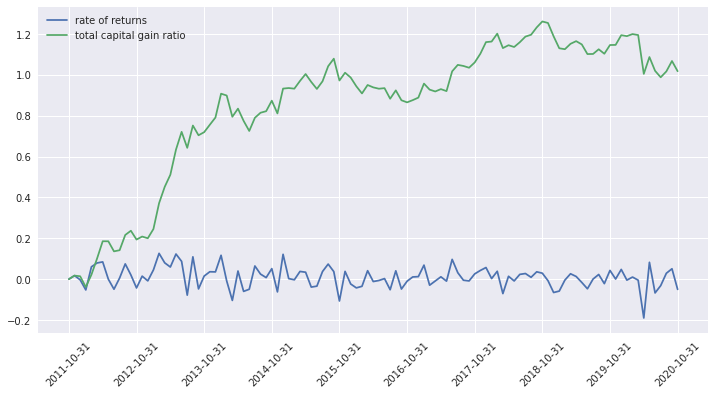

In [80]:
# Model Params
params = {
    "window_size": 12,
    "rebalance_freq": 1,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]

# Model (mmvp)
model = SharpeRatioMaxModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)

fig = model.plot_returns()
fig.savefig(f"../figures/srmp_tpx30_w={params['window_size']}_plot.png", bbox_inches="tight")
del model
del fig

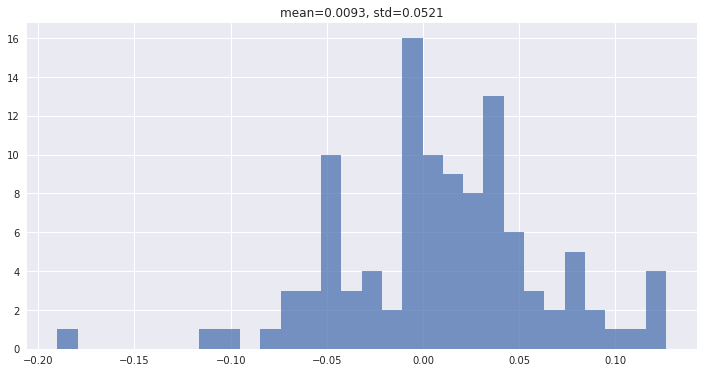

In [81]:
x = df_bt["ror"].values
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.figure(figsize=(12,6))
plt.hist(x, bins=30, alpha=0.75)
plt.title(f"mean={r_mean}, std={r_std}")
plt.savefig(f"../figures/srmp_tpx30_w={params['window_size']}_hist.png", bbox_inches="tight")

In [33]:
y = df_bt["ror"].values
x = df_tpx[ST_BACKTEST.strftime('%Y-%m-%d'):ED_BACKTEST.strftime('%Y-%m-%d')]["^TPX"].values
np.corrcoef(x,y)

array([[1.        , 0.07462139],
       [0.07462139, 1.        ]])

#### SharpeRatioMaxModel

data=tpx core30, window_size=36

Portfolio Performance
Returns per month
  sharpe ratio     : 0.21173144
  mean of returns  : 0.01037744
  std of returns   : 0.04897293
    risk-free rate : 0.00000833
    capgain ratio  : 1.71027698
Returns per year
  sharpe ratio     : 0.73345924
  mean of returns  : 0.12452931
  std of returns   : 0.16964721


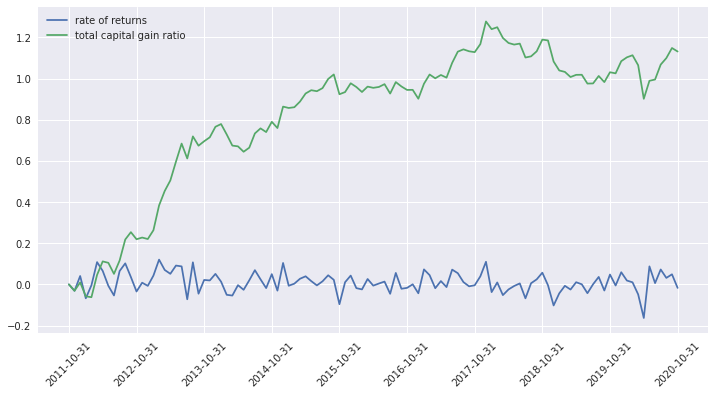

In [82]:
# Model Params
params = {
    "window_size": 36,
    "rebalance_freq": 1,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]

# Model (mmvp)
model = SharpeRatioMaxModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)

fig = model.plot_returns()
fig.savefig(f"../figures/srmp_tpx30_w={params['window_size']}_plot.png", bbox_inches="tight")
del model
del fig

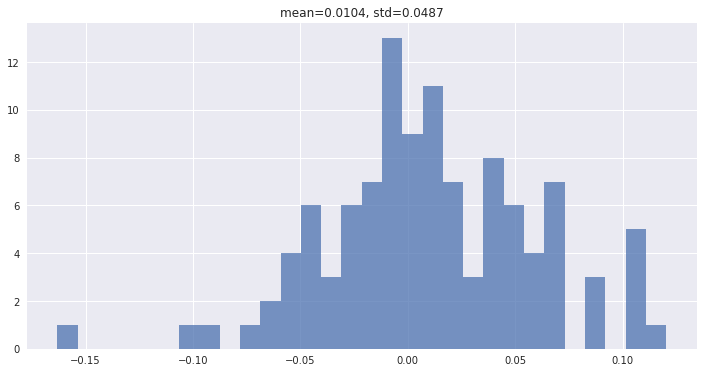

In [83]:
x = df_bt["ror"].values
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.figure(figsize=(12,6))
plt.hist(x, bins=30, alpha=0.75)
plt.title(f"mean={r_mean}, std={r_std}")
plt.savefig(f"../figures/srmp_tpx30_w={params['window_size']}_hist.png", bbox_inches="tight")

In [36]:
y = df_bt["ror"].values
x = df_tpx[ST_BACKTEST.strftime('%Y-%m-%d'):ED_BACKTEST.strftime('%Y-%m-%d')]["^TPX"].values
np.corrcoef(x,y)

array([[1.        , 0.10626692],
       [0.10626692, 1.        ]])

#### SharpeRatioMaxModel

data=tpx core30, window_size=60

Portfolio Performance
Returns per month
  sharpe ratio     : 0.19065515
  mean of returns  : 0.01000771
  std of returns   : 0.05244746
    risk-free rate : 0.00000833
    capgain ratio  : 1.55599767
Returns per year
  sharpe ratio     : 0.66044880
  mean of returns  : 0.12009255
  std of returns   : 0.18168335


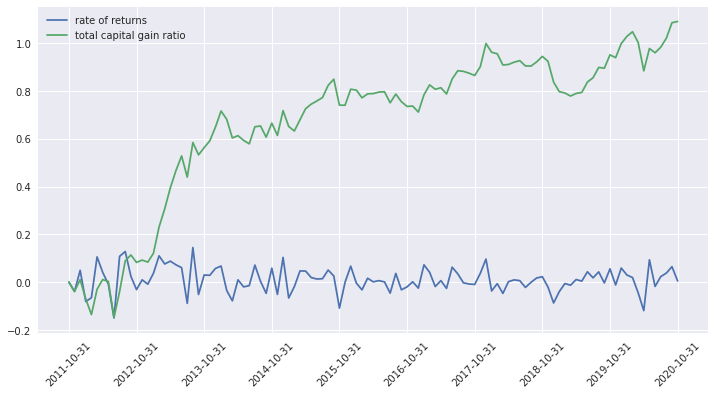

In [84]:
# Model Params
params = {
    "window_size": 60,
    "rebalance_freq": 1,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]

# Model (mmvp)
model = SharpeRatioMaxModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)

fig = model.plot_returns()
fig.savefig(f"../figures/srmp_tpx30_w={params['window_size']}_plot.png", bbox_inches="tight")
del model
del fig

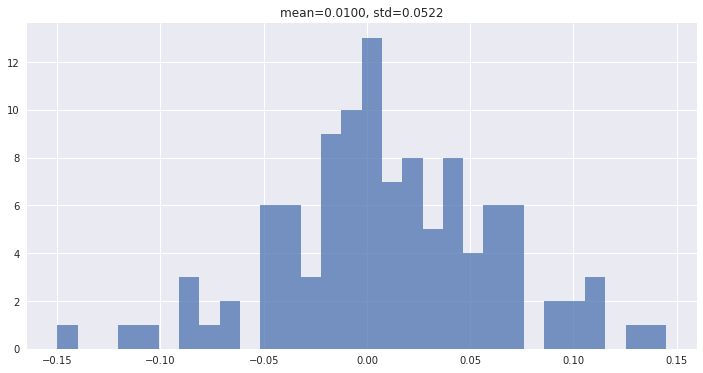

In [85]:
x = df_bt["ror"].values
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.figure(figsize=(12,6))
plt.hist(x, bins=30, alpha=0.75)
plt.title(f"mean={r_mean}, std={r_std}")
plt.savefig(f"../figures/srmp_tpx30_w={params['window_size']}_hist.png", bbox_inches="tight")

In [39]:
y = df_bt["ror"].values
x = df_tpx[ST_BACKTEST.strftime('%Y-%m-%d'):ED_BACKTEST.strftime('%Y-%m-%d')]["^TPX"].values
np.corrcoef(x,y)

array([[1.        , 0.07853958],
       [0.07853958, 1.        ]])

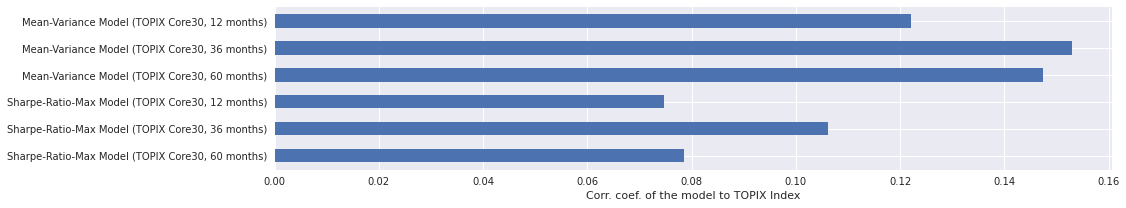

In [70]:
x = [
    "Mean-Variance Model (TOPIX Core30, 12 months)",
    "Mean-Variance Model (TOPIX Core30, 36 months)",
    "Mean-Variance Model (TOPIX Core30, 60 months)",
    "Sharpe-Ratio-Max Model (TOPIX Core30, 12 months)",
    "Sharpe-Ratio-Max Model (TOPIX Core30, 36 months)",
    "Sharpe-Ratio-Max Model (TOPIX Core30, 60 months)",
]

y = [
    0.12210366,
    0.15293459,
    0.14740142,
    0.07462139,
    0.10626692,
    0.07853958
]

fig, ax = plt.subplots(figsize=(15,3))
ax.barh(x, y, align="center", height=0.5)
ax.set_yticks(x)
ax.invert_yaxis()
plt.xlabel("Corr. coef. of the model to TOPIX Index")
# plt.show()
plt.savefig("../figures/vs_tpx_corrcoef.png", bbox_inches="tight")

#### MarkowitzMinVarianceModel

data=tpx 500, window_size=12, r_e=df_tpx.min

Portfolio Performance
Returns per month
  sharpe ratio     : 0.14958744
  mean of returns  : 0.00504584
  std of returns   : 0.03367601
    risk-free rate : 0.00000833
    capgain ratio  : 0.62833605
Returns per year
  sharpe ratio     : 0.51818609
  mean of returns  : 0.06055010
  std of returns   : 0.11665712


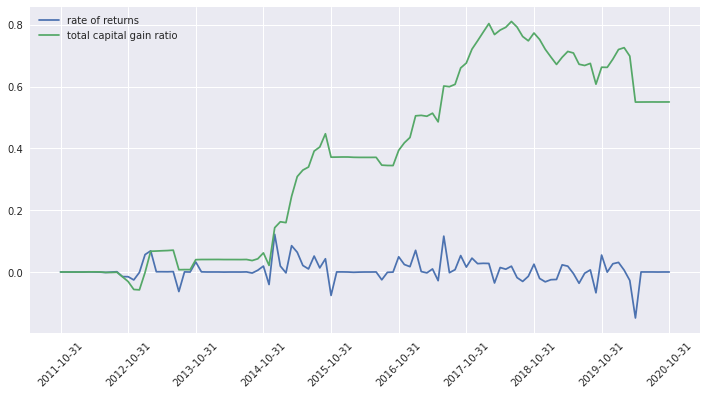

In [25]:
# Model Params
params = {
    "window_size": 12,
    "rebalance_freq": 1,
    "r_e": df_tpx,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx500[st:ed]

# Model (mmvp)
model = MarkowitzMinVarianceModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)

fig = model.plot_returns()
fig.savefig(f"../figures/mmvp_tpx500_w={params['window_size']}_rf={r_f}_re=tpxmin_{ST_BACKTEST}-{ED_BACKTEST}.png", bbox_inches="tight")
del model

#### MarkowitzMinVarianceModel

data=tpx 500, window_size=36, r_e=df_tpx.min

Portfolio Performance
Returns per month
  sharpe ratio     : 0.12378643
  mean of returns  : 0.00107116
  std of returns   : 0.00858601
    risk-free rate : 0.00000833
    capgain ratio  : 0.11948468
Returns per year
  sharpe ratio     : 0.42880877
  mean of returns  : 0.01285397
  std of returns   : 0.02974280


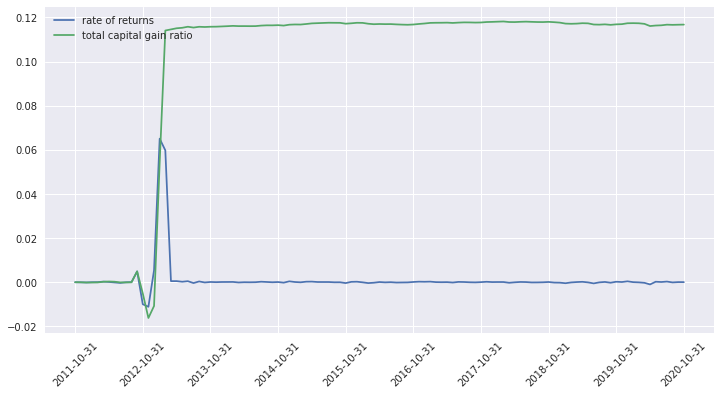

In [31]:
# Model Params
params = {
    "window_size": 36,
    "rebalance_freq": 1,
    "r_e": df_tpx,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx500[st:ed]

# Model (mmvp)
model = MarkowitzMinVarianceModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)

fig = model.plot_returns()
# fig.savefig(f"../figures/mmvp_tpx500_w={params['window_size']}_rf={r_f}_re=tpxmin_{ST_BACKTEST}-{ED_BACKTEST}.png", bbox_inches="tight")
del model

#### MarkowitzMinVarianceModel

data=tpx 500, window_size=60, r_e=df_tpx.min

Portfolio Performance
Returns per month
  sharpe ratio     : 0.12886159
  mean of returns  : 0.00108028
  std of returns   : 0.00831860
    risk-free rate : 0.00000833
    capgain ratio  : 0.12085514
Returns per year
  sharpe ratio     : 0.44638964
  mean of returns  : 0.01296338
  std of returns   : 0.02881649


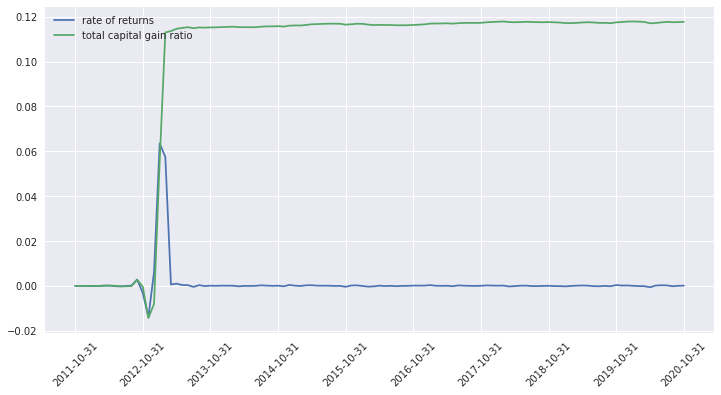

In [30]:
# Model Params
params = {
    "window_size": 60,
    "rebalance_freq": 1,
    "r_e": 0.000,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx500[st:ed]

# Model (mmvp)
model = MarkowitzMinVarianceModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)

fig = model.plot_returns()
# fig.savefig(f"../figures/mmvp_tpx500_w={params['window_size']}_rf={r_f}_re=tpxmin_{ST_BACKTEST}-{ED_BACKTEST}.png", bbox_inches="tight")
del model

---

#### SharpeRatioMaxModel

data=tpx core30, window_size=12

Portfolio Performance
Returns per month
  sharpe ratio     : 0.17843329
  mean of returns  : 0.00934051
  std of returns   : 0.05230066
    risk-free rate : 0.00000833
    capgain ratio  : 1.37700126
Returns per year
  sharpe ratio     : 0.61811104
  mean of returns  : 0.11208614
  std of returns   : 0.18117479


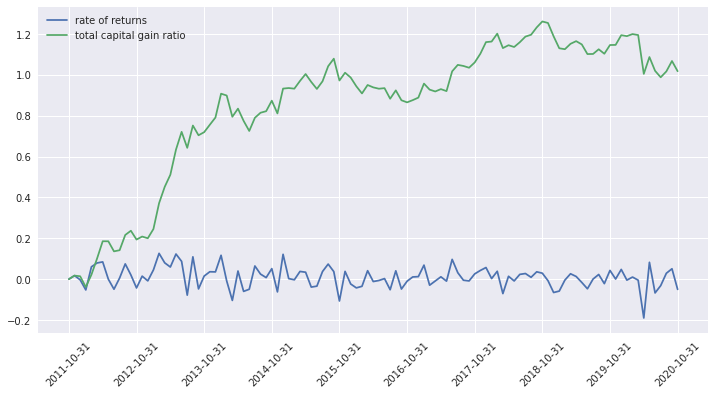

In [6]:
# Model Params
params = {
    "window_size": 12,
    "rebalance_freq": 1,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]

# Model (mmvp)
model = SharpeRatioMaxModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)

fig = model.plot_returns()
fig.savefig(f"../figures/srmp_tpx30_w={params['window_size']}_rf={r_f}_{ST_BACKTEST}-{ED_BACKTEST}.png", bbox_inches="tight")
del model

#### SharpeRatioMaxModel

data=tpx core30, window_size=36

Portfolio Performance
Returns per month
  sharpe ratio     : 0.21173144
  mean of returns  : 0.01037744
  std of returns   : 0.04897293
    risk-free rate : 0.00000833
    capgain ratio  : 1.71027698
Returns per year
  sharpe ratio     : 0.73345924
  mean of returns  : 0.12452931
  std of returns   : 0.16964721


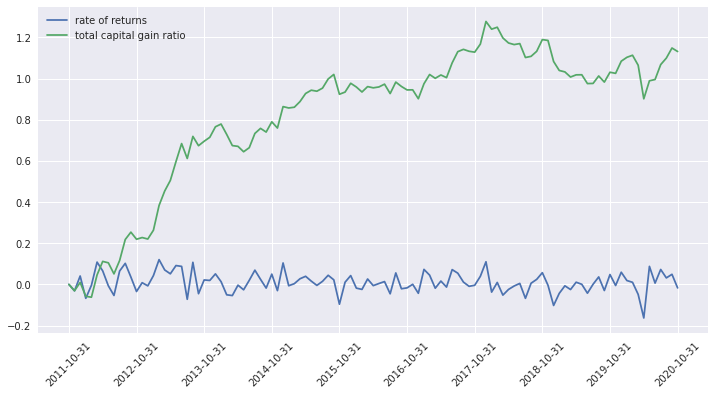

In [5]:
# Model Params
params = {
    "window_size": 36,
    "rebalance_freq": 1,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]

# Model (mmvp)
model = SharpeRatioMaxModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)

fig = model.plot_returns()
fig.savefig(f"../figures/srmp_tpx30_w={params['window_size']}_rf={r_f}_{ST_BACKTEST}-{ED_BACKTEST}.png", bbox_inches="tight")
del model

#### SharpeRatioMaxModel

data=tpx 30, window_size=60

Portfolio Performance
Returns per month
  sharpe ratio     : 0.19065515
  mean of returns  : 0.01000771
  std of returns   : 0.05244746
    risk-free rate : 0.00000833
    capgain ratio  : 1.55599767
Returns per year
  sharpe ratio     : 0.66044880
  mean of returns  : 0.12009255
  std of returns   : 0.18168335


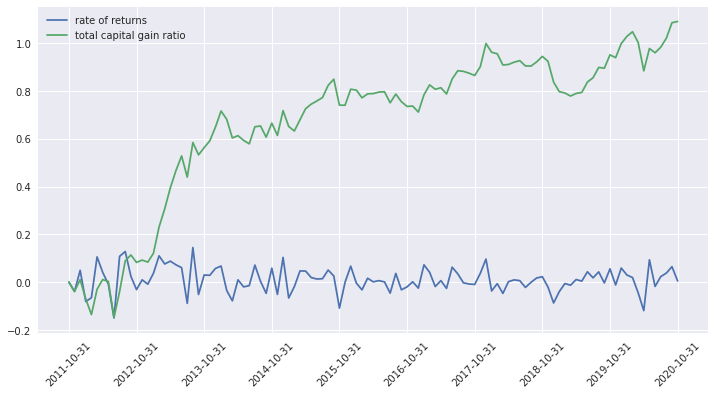

In [7]:
# Model Params
params = {
    "window_size": 60,
    "rebalance_freq": 1,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]

# Model (mmvp)
model = SharpeRatioMaxModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)

fig = model.plot_returns()
fig.savefig(f"../figures/srmp_tpx30_w={params['window_size']}_rf={r_f}_{ST_BACKTEST}-{ED_BACKTEST}.png", bbox_inches="tight")
del model